# Beyond Hello World, A Computer Vision Example
# 超越Hello World，一个计算机视觉的实例
In the previous exercise you saw how to create a neural network that figured out the problem you were trying to solve. This gave an explicit example of learned behavior. Of course, in that instance, it was a bit of overkill because it would have been easier to write the function Y=2x-1 directly, instead of bothering with using Machine Learning to learn the relationship between X and Y for a fixed set of values, and extending that for all values.

But what about a scenario where writing rules like that is much more difficult -- for example a computer vision problem? Let's take a look at a scenario where we can recognize different items of clothing, trained from a dataset containing 10 different types.

在上一个练习中，你看到了如何创建一个神经网络，让它学会图解决某个问题。那是一个计算机习得行为的明确例子。当然，就那个例子而言，运用神经元网络来解决有点大炮轰苍蝇的意思，因为直接写出函数Y=2x-1会更容易，而不是费力地使用机器学习来学习X和Y之间对于一组固定值的关系，并将其扩展到所有值。

但是，在一个场景下，写出明确的函数规则要困难得多，比如计算机视觉问题。让我们来看这样一个场景，让计算机识别不同的服装用品（有提包、鞋子、裤子等10类物品）。我们将用包含10种不同类型的物品图片的数据集来训练一个神经元网络，实现分类。

## Start Coding
## 开始编程
Let's start with our import of TensorFlow

首先导入TensorFlow

In [43]:
import tensorflow as tf
import matplotlib.pyplot as plt

print(tf.__version__)

2.18.0


The Fashion MNIST data is available directly in the tf.keras datasets API. You load it like this:
通过tf.keras的API可以直接获得Fashion MNIST数据集，像这样：

In [44]:
mnist = tf.keras.datasets.fashion_mnist

Calling load_data on this object will give you two sets of two lists, these will be the training and testing values for the graphics that contain the clothing items and their labels.
在mnist对象上调用load_data方法会得到两个元组，各自包含两个列表。这些列表存储了服装用品的训练与测试图像数据及标签值。

In [45]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

What does these values look like? Let's print a training image, and a training label to see...Experiment with different indices in the array. For example, also take a look at index 42...that's a a different boot than the one at index 0
这些值是什么样子的呢？让我们打印一个训练图像，和一个训练标签来看看......用数组中不同的索引做实验。例如，也可以看看索引42......那也是另一张鞋子的图片。

9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 

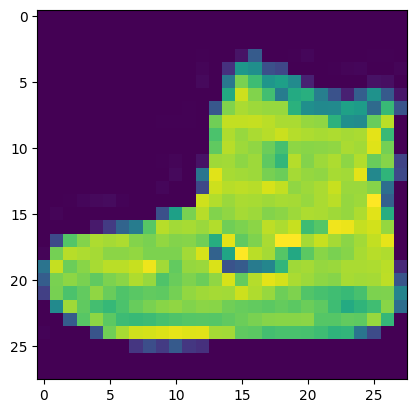

In [46]:
import matplotlib.pyplot as plt
plt.imshow(training_images[0])
print(training_labels[0])
print(training_images[0])

You'll notice that all of the values in the number are between 0 and 255. If we are training a neural network, for various reasons it's easier if we treat all values as between 0 and 1, a process called '**normalizing**'...and fortunately in Python it's easy to normalize a list like this without looping. You do it like this:

你会注意到，数字中的所有值都在0和255之间。如果我们要训练一个神经网络，出于多种原因，如果把所有的值都处理成0和1之间，那就更容易得到较好的训练效果。这个过程叫做 "**归一化**"......幸运的是，在Python中，很容易对这样的列表进行归一化，而不需要循环。可以这样做：

In [47]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

Now you might be wondering why there are 2 sets...training and testing -- remember we spoke about this in the intro? The idea is to have 1 set of data for training, and then another set of data...that the model hasn't yet seen...to see how good it would be at classifying values. After all, when you're done, you're going to want to try it out with data that it hadn't previously seen!

你可能在想为什么有2组数据-训练集和测试集。记得在介绍中说过的吗？基本想法是将1组数据用于训练，然后用另一组数据评估模型在分类值方面的表现会有多好。测试数据必须是模型还没有看到过的。毕竟，当完成模型的训练后，必定想用它之前没有见过的数据来试一试!

Let's now design the model. There's quite a few new concepts here, but don't worry, you'll get the hang of them. 
现在我们来设计Fashion MNIST分类模型。这里有不少新的概念，不过别担心，你会掌握它们的窍门。

In [48]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

**Sequential**: That defines a SEQUENCE of layers in the neural network

**Flatten**: Remember earlier where our images were a square, when you printed them out? Flatten just takes that square and turns it into a 1 dimensional set.

**Dense**: Adds a layer of neurons

Each layer of neurons need an **activation function** to tell them what to do. There's lots of options, but just use these for now. 

**Relu** effectively means "If X>0 return X, else return 0" -- so what it does it it only passes values 0 or greater to the next layer in the network.

**Softmax** takes a set of values, and effectively picks the biggest one, so, for example, if the output of the last layer looks like [0.1, 0.1, 0.05, 0.1, 9.5, 0.1, 0.05, 0.05, 0.05], it saves you from fishing through it looking for the biggest value, and turns it into [0,0,0,0,1,0,0,0,0] -- The goal is to save a lot of coding!

**Sequential**。这定义了神经网络中的层数序列。一开始学习神经元网络总是使用序列模型。

**Flatten**。还记得上面将图像打印出来的时候是一个正方形吗？扁平化只是把这个正方形变成了一个一维的集合。把二维数组变成一维数组。

**Dense**：增加一层神经元。

每一层神经元都需要一个**激活函数 activation**来告诉它们输出什么。有很多选项，但目前只用这些（relu和softmax）。

**Relu**的意思是 "如果X>0返回X，否则返回0"--所以它的作用是它只把大于0的值传递给网络中的下一层，小于0的也当作0。

**Softmax**激活函数接收到一组值后，选择其中最大的一个输出。例如，上一层的输出为[0.1, 0.1, 0.05, 0.1, 9.5, 0.1, 0.05, 0.05, 0.05]，Softmax就省去了你在其中寻找最大的值，并把它变成[0,0,0,0,0,1,0,0,0,0,0] **Softmax**的意思是 "如果X>0，则返回X，否则返回0" -- 所以它的作用是只把0或更大的值传给下一层的网络。--其目的是节省大量的编码！


The next thing to do, now the model is defined, is to actually build it. You do this by compiling it with an optimizer and loss function as before -- and then you train it by calling **model.fit ** asking it to fit your training data to your training labels -- i.e. have it figure out the relationship between the training data and its actual labels, so in future if you have data that looks like the training data, then it can make a prediction for what that data would look like. 

现在模型已经定义好了，下一步要做的事情就是实际建立它。可以像之前一样用优化器和损失函数编译它--然后通过调用*model.fit*来训练它，要求它将训练数据与标签拟合--即让模型找出训练数据和标签之间的关系。训练好之后，它将能对格式与训练数据相同，但从未“见过”的新数据做出预测。

In [49]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7822 - loss: 0.6244
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8650 - loss: 0.3763
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8766 - loss: 0.3327
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8882 - loss: 0.3010
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8914 - loss: 0.2912


Once it's done training -- you should see an accuracy value at the end of the final epoch. It might look something like 0.9098. This tells you that your neural network is about 91% accurate in classifying the training data. I.E., it figured out a pattern match between the image and the labels that worked 91% of the time. Not great, but not bad considering it was only trained for 5 epochs and done quite quickly.

But how would it work with unseen data? That's why we have the test images. We can call model.evaluate, and pass in the two sets, and it will report back the loss for each. Let's give it a try:

一旦模型完成了训练 -- 能在最后一个epoch结束时看到一个准确率值。它可能看起来像0.9098。这告诉我们，神经网络对训练数据的分类准确率约为91%。即，它找出了图像和标签之间的模式匹配，91%的分类结果都正确。考虑到只训练了5个epochs，而且做得相当快，所以结果还不错。

但对于未见过的数据，它的分类准确度有多高？这就是为什么我们需要测试图像的原因。我们可以调用model.evaluation，并将用于测试的图像和标签数据传入，它会报告测试数据的损失。让我们试一试。

In [50]:
model.evaluate(test_images, test_labels)



313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 470us/step - accuracy: 0.8766 - loss: 0.3453


[0.35459837317466736, 0.8748000264167786]

For me, that returned a accuracy of about .8838, which means it was about 88% accurate. As expected it probably would not do as well with *unseen* data as it did with data it was trained on!  As you go through this course, you'll look at ways to improve this. 

To explore further, try the below exercises:

模型评估返回的准确率约为0.8838，这意味着它的准确率约为88%。正如预期的那样，模型对*未见过*的数据可能不会像对它训练过的数据那样做得那么好!  在这门课程中，我们会学习如何提高模型对测试数据的准确率。

请尝试下面的练习，进一步探索。

# Exploration Exercises

###Exercise 1:
For this first exercise run the below code: It creates a set of classifications for each of the test images, and then prints the first entry in the classifications. The output, after you run it is a list of numbers. Why do you think this is, and what do those numbers represent? 

###练习1
请运行以下代码。程序根据测试图像集生成了一组分类，然后打印出分类中的第一条记录。 运行print后，输出的是一个数字列表。请解释下这些数字代表什么？

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 478us/step
[1.4052829e-06 6.9568038e-08 6.2972717e-08 1.7720436e-09 9.8395809e-08
 5.9432168e-03 1.0856497e-07 3.5963047e-02 2.3935897e-06 9.5808953e-01]
9


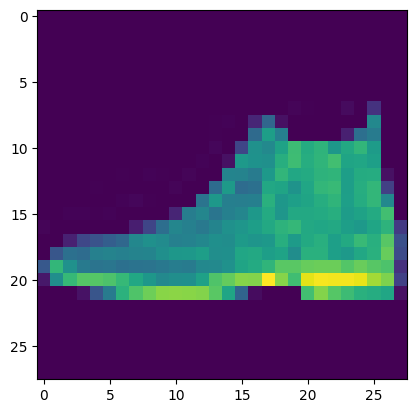

In [51]:
classifications = model.predict(test_images)

# 打印出的结果为10个数字的列表，每个数字代表对应的类别的概率
print(classifications[0])
print(test_labels[0])
plt.imshow(test_images[0])


Hint: try running print(test_labels[0]) -- and you'll get a 9. Does that help you understand why this list looks the way it does? 

提示：试着运行print(test_labels[0]) -- 会得到一个9。这是否有助于理解为什么列表看起来是这样的？

9


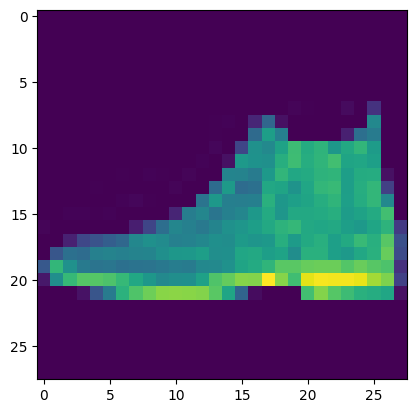

In [52]:
# 结果9代表第1个测试集的标签
print(test_labels[0])
plt.imshow(test_images[0])

### What does this list represent?


1.   It's 10 random meaningless values
2.   It's the first 10 classifications that the computer made
3.   It's the probability that this item is each of the 10 classes

###这个列表代表什么？

1.   这是10个随机的无意义的值
2.   这是计算机做出的前10张图片的分类。
3.   这是一张图像对应10类中每一类的概率。


####Answer: 
The correct answer is (3)

The output of the model is a list of 10 numbers. These numbers are a probability that the value being classified is the corresponding value, i.e. the first value in the list is the probability that the handwriting is of a '0', the next is a '1' etc. Notice that they are all VERY LOW probabilities.

For the 7, the probability was .999+, i.e. the neural network is telling us that it's almost certainly a 7.

####Answer。
正确答案是(3)

该模型的输出是一个由10个数字组成的列表。这些数字是被分类的值与对应值的概率，即列表中的第一个值是类别 "0 "的概率，下一个是 "1 "的概率，等等。注意，它们的概率都很低。

对于9，概率最高，即神经网络告诉我们，最可能的是9。

### How do you know that this list tells you that the item is an ankle boot?


1.   There's not enough information to answer that question
2.   The 10th element on the list is the biggest, and the ankle boot is labelled 9
2.   The ankle boot is label 9, and there are 0->9 elements in the list

###怎么知道这个列表告诉你这个商品是踝靴？


1.   没有足够的信息来回答这个问题。
2.   列表中的第10个元素是最大的，并且踝靴的标签是9。
2.   踝靴的标签为9，列表中存在0->9个元素。


####Answer
The correct answer is (2). Both the list and the labels are 0 based, so the ankle boot having label 9 means that it is the 10th of the 10 classes. The list having the 10th element being the highest value means that the Neural Network has predicted that the item it is classifying is most likely an ankle boot

#### 回答
正确答案是（2）。列表和标签都是以0为基础的，所以脚踝靴的标签为9，意味着它是10个类别中的第10个。列表中第10个元素的值最高，意味着神经网络已经预测出它所分类的物品最有可能是一只脚踝靴。

##Exercise 2: 
Let's now look at the layers in your model. Experiment with different values for the dense layer with 512 neurons. What different results do you get for loss, training time etc? Why do you think that's the case? 

##练习2。
现在让我们看看模型的中间层。尝试用不同值代替512（神经元），对全连接层进行实验。得到的损失、训练时间等结果有什么不同？为什么会这样？

In [53]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

2.18.0
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.3409
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0814
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0506
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0331
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0242
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 746us/step - loss: 0.1036
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 925us/step
[4.2297497e-08 8.4898999e-10 1.4860080e-07 8.5382617e-06 8.7445030e-11
 6.1574729e-10 1.7532450e-12 9.9998915e-01 6.8605090e-08 2.0183945e-06]
7


0


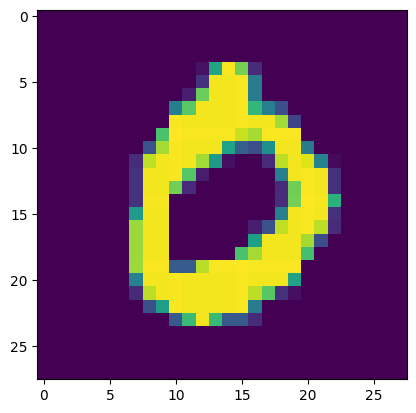

In [57]:
print(test_labels[3])
plt.imshow(test_images[3])

###Question 1. Increase to 1024 Neurons -- What's the impact?

1. Training takes longer, but is more accurate
2. Training takes longer, but no impact on accuracy
3. Training takes the same time, but is more accurate

###问题1：增加到1024个神经元--有什么影响？

1. 训练时间更长，但更准确
2. 训练时间较长，但对准确性没有影响
3. 训练需要同样的时间，但更准确。


####Answer
The correct answer is (1) by adding more Neurons we have to do more calculations, slowing down the process, but in this case they have a good impact -- we do get more accurate. That doesn't mean it's always a case of 'more is better', you can hit the law of diminishing returns very quickly!

#### 回答
正确的答案是(1)通过增加更多的神经元，计算机必须做更多的计算，减慢了训练过程。但对于本案例，增加神经元数量有积极的影响--确实得到了更好的准确度。但这并不意味着总是 "越多越好"，因为很快就会遇到收益递减的定律。

##Exercise 3: 

What would happen if you remove the Flatten() layer. Why do you think that's the case? 

You get an error about the shape of the data. It may seem vague right now, but it reinforces the rule of thumb that the first layer in your network should be the same shape as your data. Right now our data is 28x28 images, and 28 layers of 28 neurons would be infeasible, so it makes more sense to 'flatten' that 28,28 into a 784x1. Instead of wriitng all the code to handle that ourselves, we add the Flatten() layer at the begining, and when the arrays are loaded into the model later, they'll automatically be flattened for us.

##练习3。

如果删除Flatten()层，会发生什么情况？为什么会出现这种情况？

会得到一个关于数据形状的错误。因为神经元网络中的第一层应该与输入数据的形状相同。现在我们的数据是28x28的图像，28层28个神经元是不可行的，所以把28,28 "扁平化 "成784x1。不需要自己编写所有的代码来实现扁平化，而是在模型最上面添加Flatten()层，当把数组加载到模型中时，它们会自动为扁平化。

In [55]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([#tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(64, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

2.18.0
Epoch 1/5


ValueError: Argument `output` must have rank (ndim) `target.ndim - 1`. Received: target.shape=(32,), output.shape=(32, 28, 10)

##Exercise 4: 

Consider the final (output) layers. Why are there 10 of them? What would happen if you had a different amount than 10? For example, try training the network with 5

You get an error as soon as it finds an unexpected value. Another rule of thumb -- the number of neurons in the last layer should match the number of classes you are classifying for. In this case it's the digits 0-9, so there are 10 of them, hence you should have 10 neurons in your final layer.

##练习4。

考虑最后（产出）层。为什么有10个神经元？如果数量少于10会发生什么？例如，尝试改作5个来训练网络。

一旦模型发现一个意外的值，就会产生一个错误。规则是--最后一层的神经元数量应该与你要分类的类数相匹配。在这种情况下，是数字0-9，所以有10个，因此你的最后一层应该有10个神经元。

In [ ]:
import tensorflow as tf
print(tf.__version__)

#  加载的数据集是 MNIST 0~9 的手写数字图片，共 28*28 像素，共 60,000 张训练图片，10,000 张测试图片
mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(64, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(5, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

##Exercise 5: 

Consider the effects of additional layers in the network. What will happen if you add another layer between the one with 512 and the final layer with 10. 

Ans: There isn't a significant impact -- because this is relatively simple data. For far more complex data (including color images to be classified as flowers that you'll see in the next lesson), extra layers are often necessary. 

##练习5。

考虑网络中增加层数的影响。如果在512层和10层之间再加一层会发生什么？

答案：没有显著影响--因为这是相对简单的数据。对于复杂得多的数据，通常要增加额外的层。

In [58]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(256, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

2.18.0
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.3229
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.0795
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.0534
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.0397
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.0281
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 974us/step - loss: 0.0890
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
[2.4717922e-11 7.0190542e-09 3.9159467e-11 1.5885137e-08 1.1989155e-11
 3.5364251e-12 8.5058574e-14 9.9999988e-01 6.0701937e-11 8.8507448e-08]
7


1


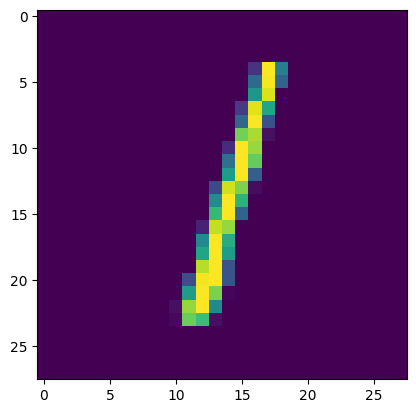

In [62]:
print(test_labels[2])
plt.imshow(test_images[2])


#Exercise 6: 

Consider the impact of training for more or less epochs. Why do you think that would be the case? 

Try 15 epochs -- you'll probably get a model with a much better loss than the one with 5
Try 30 epochs -- you might see the loss value stops decreasing, and sometimes increases. This is a side effect of something called 'overfitting' which you can learn about [somewhere] and it's something you need to keep an eye out for when training neural networks. There's no point in wasting your time training if you aren't improving your loss, right! :)

#练习6。

请考虑改变训练epochs次数，为有什么影响？

试试15个epochs--可能会得到一个比5个epochs更好的模型,损失更小。
试试30个epochs--可能会看到损失值停止下降，有时还会增加。这是被称为 "过拟合 "的副作用，在训练神经网络时，需要一直注意这个问题。如果损失没有改善，那么浪费时间继续训练是没有意义的，对吧！ :)

In [63]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=30)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[34])
print(test_labels[34])

2.18.0
Epoch 1/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.4436
Epoch 2/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.1204
Epoch 3/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0780
Epoch 4/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0562
Epoch 5/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0451
Epoch 6/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0335
Epoch 7/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0254
Epoch 8/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0221
Epoch 9/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0169
Epoch 10/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0150
Epoch 11/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0116
Epoch 12/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0091
Epoch 13/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0086
Epoch 14/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0074
Epoch 15/30
1875/1875 

4


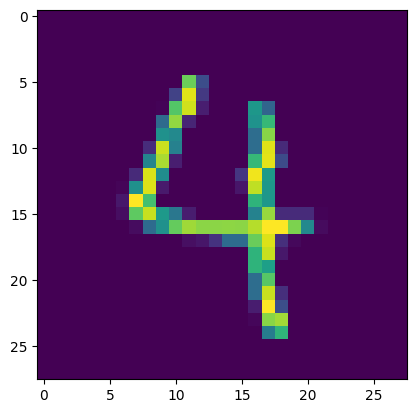

In [65]:
print(test_labels[24])
plt.imshow(test_images[24])


#Exercise 7: 

Before you trained, you normalized the data, going from values that were 0-255 to values that were 0-1. What would be the impact of removing that? Here's the complete code to give it a try. Why do you think you get different results? 

#练习7。

在训练之前，对数据进行了归一化处理，从0-255的数值变成了0-1的数值。去掉归一化会有什么影响？下面是完整的代码，可以试一试。会得到什么不同的结果？

In [ ]:
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images/255.0
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.fit(training_images, training_labels, epochs=5)
model.evaluate(test_images, test_labels)
classifications = model.predict(test_images)
print(classifications[0])
print(test_labels[0])

# 去掉归一化，会导致训练结果不准确

2.18.0
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.3354
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0809
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0522
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0336
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0254
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 778us/step - loss: 0.0773
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 880us/step
[7.1160859e-12 1.6483571e-10 7.4240267e-09 8.3917115e-08 2.2061515e-12
 1.0470030e-09 2.4527350e-14 9.9999976e-01 6.3529748e-10 1.3299065e-07]
7


#Exercise 8: 

Earlier when you trained for extra epochs you had an issue where your loss might change. It might have taken a bit of time for you to wait for the training to do that, and you might have thought 'wouldn't it be nice if I could stop the training when I reach a desired value?' -- i.e. 95% accuracy might be enough for you, and if you reach that after 3 epochs, why sit around waiting for it to finish a lot more epochs....So how would you fix that? Like any other program...you have callbacks! Let's see them in action...

#练习8。

之前在训练模型的时候，你可能会想'如果可以在达到一个期望值的时候停止训练不是很好吗？'--即95%的准确率对你来说可能已经足够了，如果你在3个epochs后达到了这个值，为什么还要坐等它完成更多的训练次数呢....，那么如何解决这个问题？就像其他很多类似程序一样......运用回调函数！让我们来看看它的实际作用。

In [69]:
import tensorflow as tf
print(tf.__version__)

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('loss')<0.4):
      print("\nReached 60% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images/255.0
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.fit(training_images, training_labels, epochs=5, callbacks=[callbacks])




2.18.0
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.5861
Epoch 2/5
1863/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3698
Reached 60% accuracy so cancelling training!
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.3697
